# Seoul Bike Rental Prediction

## Introduction
The objective of this competition is to predict bike rental counts  in Seoul city based on the environmental and seasonal settings.

### Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns



### Import the dataset

In [2]:
# Read train data
dataset_path = '/kaggle/input/seoul-bike-rental-ai-pro-iti/'
train = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

In [3]:
# Look at the shape of the data
print('Train shape:', train.shape)

Train shape: (5760, 15)


In [4]:
# Look at the head() of the data
train.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
train.tail()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
5755,5755,20/11/2018,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
5756,5756,20/11/2018,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,Autumn,No Holiday,Yes
5757,5757,20/11/2018,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes
5758,5758,20/11/2018,922,22,8.9,40,3.4,1810,-3.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
5759,5759,20/11/2018,378,23,9.3,43,3.5,1807,-2.6,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Read the test data
dataset_path = '/kaggle/input/seoul-bike-rental-ai-pro-iti/'
test = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

In [7]:
# Look at the shape of the test data
print('Test shape:', test.shape)

Test shape: (3000, 14)


## Exploratory Data Analysis (EDA) & Preprocessing

<b>Data fields<b>
-  Date : The day of the day, during 365 days, type : str
-  Rented Bike Count : Number of rented bikes per hour which is the target, type : int
-  Hour: The hour of the day, type : int
-  Temperature(°C): Temperature per hour in Celsius, type : Float
-  Humidity(%): Relative humidity in %, type : int
-  Wind speed (m/s) : Speed of the wind in m/s, type : Float
-  Visibility (10m): Visibility in m, type : int
-  Dew point temperature(°C): Temperature at the beggining of the day, type : Float
-  Solar Radiation (MJ/m2): Sun contribution, type : Float
-  Rainfall(mm): Amount of rain in mm, type : Float
-  Snowfall (cm): Amount of snow in cm, type : Float
-  Seasons: Season of the year, type : str
-  Holiday: If it is holiday period, type: str
-  Functioning Day: whether the day is neither a weekend nor holiday, type : str

In [8]:
# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['ID', 'Date', 'y', 'Hour', 'Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']
Test columns: ['ID', 'Date', 'Hour', 'Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [9]:
train.dtypes

ID                             int64
Date                          object
y                              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [10]:
#Summary of the dataset
train.drop(columns='ID').describe().T

,count,mean,std,min,25%,50%,75%,max
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature(�C),5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity(%),5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind speed (m/s),5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility (10m),5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew point temperature(�C),5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar Radiation (MJ/m2),5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall(mm),5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00
Snowfall (cm),5760.0,0.046302,0.323728,0.0,0.00,0.00,0.000,5.10


Missing value analysis

In [11]:
#Missing values in dataset
train.isnull().sum()

ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [12]:
# Convert date to datetime object
train['Date']=pd.to_datetime(train['Date'],format="%d/%m/%Y")

### Features Correlation

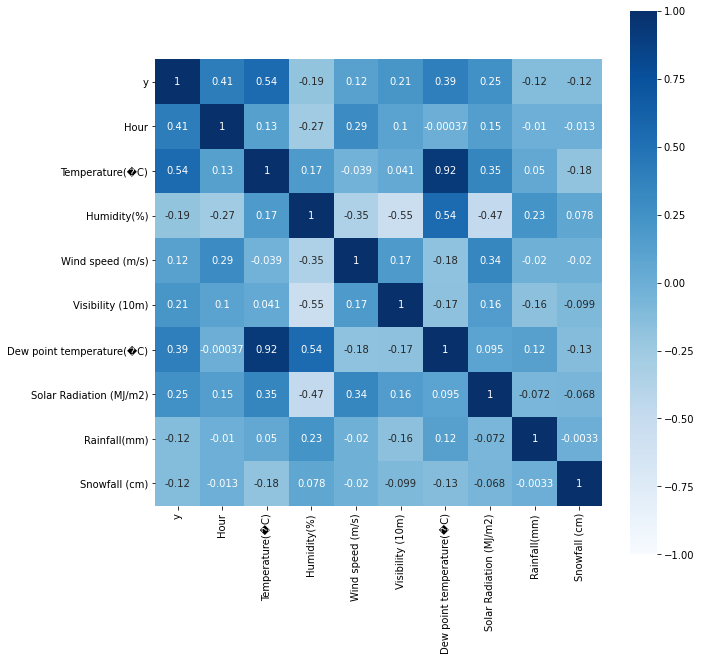

In [13]:
#Create  features correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(train.drop(columns='ID').corr("pearson"),
            vmin=-1, vmax=1,
            cmap='Blues',
            annot=True, 
            square=True);

It is obvious that the target variable y (counts) is most correlated with :
- Hour
- Temperature
- Dew point temperature
- Solar radiation

But we can also observe that there is high correlation between Temperature and Dew point temperature so we can drop the column 'Dew point temperature(°C).

In [14]:
train=train.drop(columns='Dew point temperature(�C)')


In [15]:
#create a sorted list of the most correlated features 
Corr=pd.DataFrame(train.corr().unstack().sort_values(ascending=False)['y'],columns=['Correlation with the target'])
Corr.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))


,Correlation with the target
y,1.000000
Temperature(�C),0.544281
Hour,0.407180
ID,0.365359
Solar Radiation (MJ/m2),0.250601
Visibility (10m),0.214777
Wind speed (m/s),0.116380
Rainfall(mm),-0.117711
Snowfall (cm),-0.120836
Humidity(%),-0.191603


## Data Preparation and data Visualisation using Matplotlib and seaborn

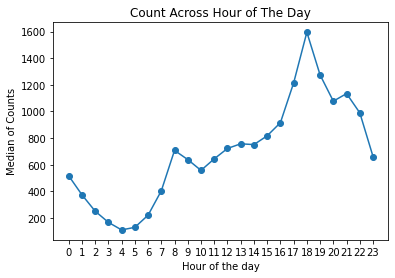

In [16]:
# Find median counts for each hour
hour_counts = train.groupby('Hour', as_index=False)['y'].median()
# Plot the line plot
plt.plot(hour_counts['Hour'], hour_counts["y"], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median of Counts')
plt.title('Count Across Hour of The Day')
plt.xticks(range(24))
plt.show()

Great! We see that counts are a bit higher during the evening. It is a good indicator that we should include the "hour" feature in the final model, or at least add a binary feature "Is_night".


In [17]:
#create a new feature to inform if it is a day or night time
train['Is_night']=train['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

In [18]:
#create a name of day of the week feature
train['WeekDay']=train["Date"].dt.day_name()
# Create a day of week feature
train['DayofWeek'] = train['Date'].dt.dayofweek
# Create an month feature
train['Month'] = train['Date'].dt.month
train.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Is_night,WeekDay,DayofWeek,Month
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,4,12
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,4,12
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,4,12
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,4,12
4,4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,4,12


### Plotting Variables-Target Relationships

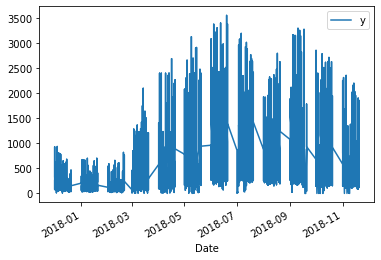

In [19]:
#Plot Date feature vs target 
train.plot(x='Date',y='y',kind='line')
plt.show()

It is quite obvious that the summer season has the most rentalss as might be expected 

In [20]:
seasons_counts=pd.DataFrame(train.groupby('Seasons')['y'].sum().sort_values(ascending=False))
seasons_counts.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))

,y
Seasons,
Summer,1563416
Autumn,1214630
Spring,940276
Winter,333745


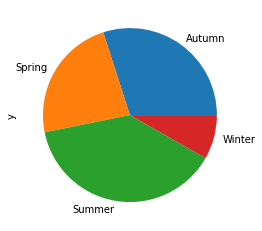

In [21]:
train.groupby('Seasons')['y'].sum().plot.pie()
plt.show()


In [22]:
train.groupby('WeekDay').sum()['y'].sort_values(ascending=False)

WeekDay
Friday       646191
Monday       612065
Tuesday      594777
Wednesday    592134
Saturday     556266
Sunday       538443
Thursday     512191
Name: y, dtype: int64

It seems that weekdays have the highest bikes rentals 

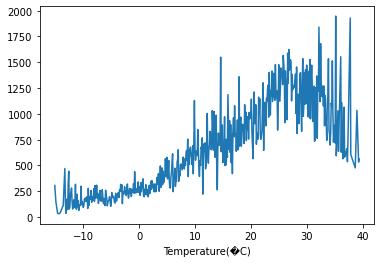

In [23]:
train.groupby('Temperature(�C)').mean()['y'].plot()
plt.show()

It seems that Korean people tends to ride bikes in hot weather.

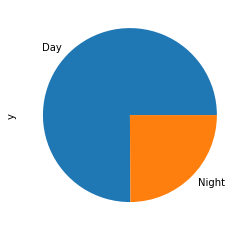

In [24]:
train.groupby('Is_night').sum()['y'].plot.pie()
plt.show()

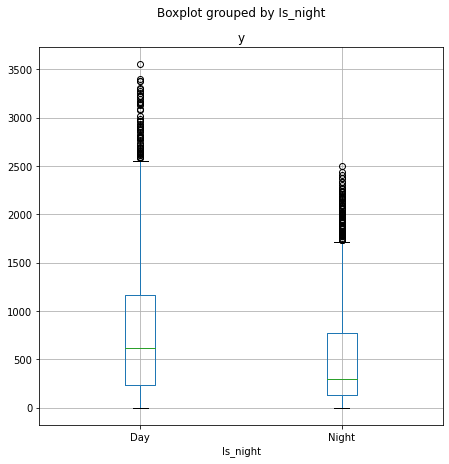

In [25]:
boxplotDay_night= train.boxplot(['y'],by='Is_night',figsize=(7,7))

According to this boxplot there are much more rentals during the day than the night

Visualisations during the holidays

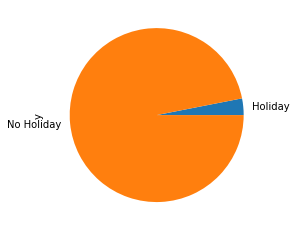

In [26]:
train.groupby('Holiday').sum()['y'].plot.pie(radius=1)
plt.show()

It means that koreansrent bikes to go to school or work and it indicates that the Holiday column is not that important to the target.

 On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.

### Outlier Analysis

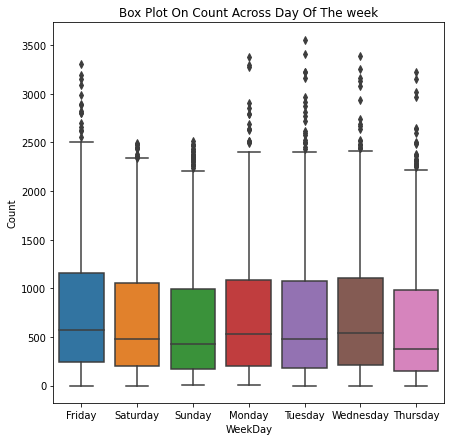

In [27]:
fig,ax=plt.subplots(figsize=(7,7))
#Boxplot for total bikes number outliers
sns.boxplot(x='WeekDay', y='y',data=train[['y','WeekDay']])
ax.set_xlabel('WeekDay')
ax.set_ylabel('Count')
ax.set_title('Box Plot On Count Across Day Of The week')
plt.show()

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

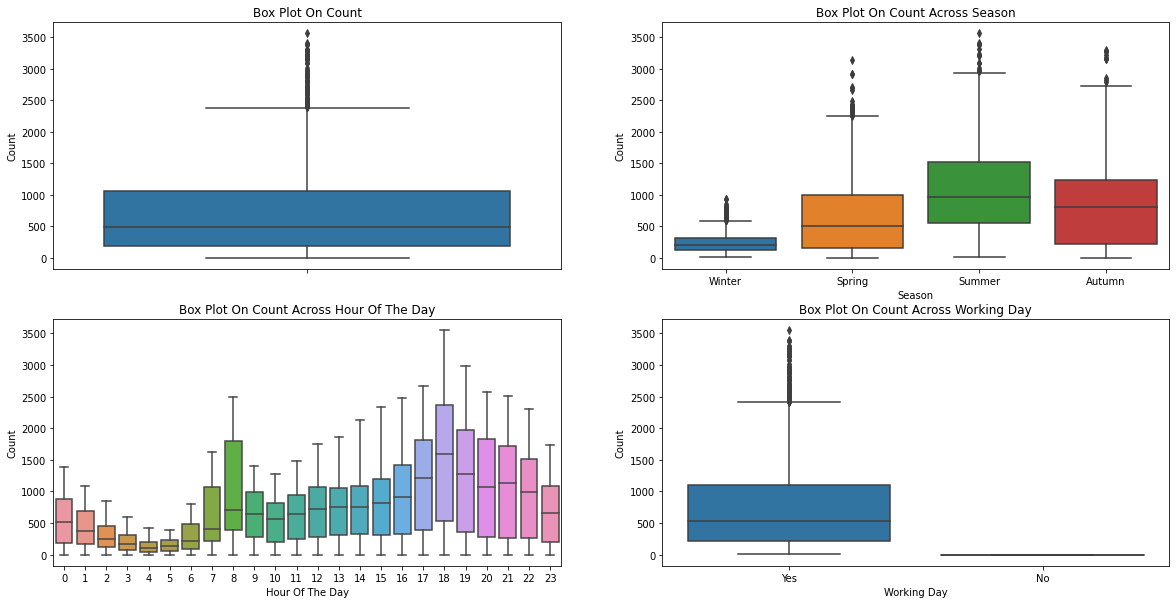

In [28]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=train[['y']],y="y",orient="v",ax=axes[0][0])
sns.boxplot(data=train[['y','Seasons']],y="y",x="Seasons",orient="v",ax=axes[0][1])
sns.boxplot(data=train[['y','Hour']],y="y",x="Hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train[['y','Functioning Day']],y="y",x="Functioning Day",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

Remove outliers in the target column

In [29]:
trainDataWithoutOutliers = train[np.abs(train["y"]-train["y"].mean())<=(3*train["y"].std())]
print ("Shape Of The Before Ouliers: ",train.shape)
print ("Shape Of The After Ouliers: ",trainDataWithoutOutliers.shape)

Shape Of The Before Ouliers:  (5760, 18)
Shape Of The After Ouliers:  (5718, 18)


## Feature Engineering

In [30]:
#Read In Train And Test Data
dataset_path = '/kaggle/input/seoul-bike-rental-ai-pro-iti/'
dataTrain = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
dataTest =pd.read_csv(os.path.join(dataset_path, 'test.csv'))

In [31]:
#Combine dataTrain And Test
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)


In [32]:
# Convert date to datetime object
data['Date']=pd.to_datetime(data['Date'],format="%d/%m/%Y")
# Create a day of week feature
data['DayofWeek'] = data['Date'].dt.dayofweek
# Create a month feature
data['Month'] = data['Date'].dt.month
# Create a year feature
data['Year'] = data['Date'].dt.year


Categorical Features

Since We are dealing with binary features in the case of  (Holiday,Functioning Day) it is suggested to apply label encoder.

In [33]:
from sklearn.preprocessing import LabelEncoder
# Label encoder
le = LabelEncoder()
# Create new features
data['Holiday'] = le.fit_transform(data["Holiday"])
data['Functioning Day'] = le.fit_transform(data["Functioning Day"])


The problem with label encoding is that it implicitly assumes that there is a ranking dependency between the categories so we changed the encoding method for the features "Seasons" to one-hot encoding. 

In [34]:
#data['peak'] = data[['Hour', 'Functioning Day']].apply(lambda x: (0, 1)[(x['Functioning Day'] == 1 and  ( x['Hour'] == 8 or 17 <= x['Hour'] <= 18 or 12 <= x['Hour'] <= 13)) or (x['Functioning Day'] == 0 and  10 <= x['Hour'] <= 19)], axis = 1)


In [35]:
# Create One-Hot encoded features
dummy_fields = ['Seasons']
dummies = pd.get_dummies(data['Seasons'], prefix='Seasons', drop_first=False)
data = pd.concat([data, dummies], axis=1)



In [36]:
#Splitting Train And Test Data
dataTrain = data[pd.notnull(data['y'])].sort_values(by=["Date"])
dataTest = data[~pd.notnull(data['y'])].sort_values(by=["Date"])



In [37]:
datetimecol = dataTest["Date"]
ID=dataTest["ID"]
yLabels = dataTrain["y"]

In [38]:
#Train and validator Split
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split( dataTrain, yLabels, test_size=0.3, random_state=42)


In [39]:
dateTimeColValidate = X_validate["Date"]

In [40]:
dataTrain.duplicated().sum()

0


Dropping Unncessary Columns

In [41]:
#Dropping Unncessary Variables
dropFeatures=['ID','y','Date','Seasons','Dew point temperature(�C)','Year']
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)
X_train = X_train.drop(dropFeatures,axis=1)
X_validate = X_validate.drop(dropFeatures,axis=1)

## Modeling

import libraires needed for modeling

In [42]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

RMSLE Scorer

In [43]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

### Linear Regression Model

In [44]:
# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
lModel.fit(X = X_train,y = np.log1p(y_train))

# Make predictions
preds = lModel.predict(X= X_validate)
print ("RMSLE Value For Linear Regression In Validation: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(preds),False))


RMSLE Value For Linear Regression In Validation:  0.6703999898137473


Visualizing Distribution Of Train And Test

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


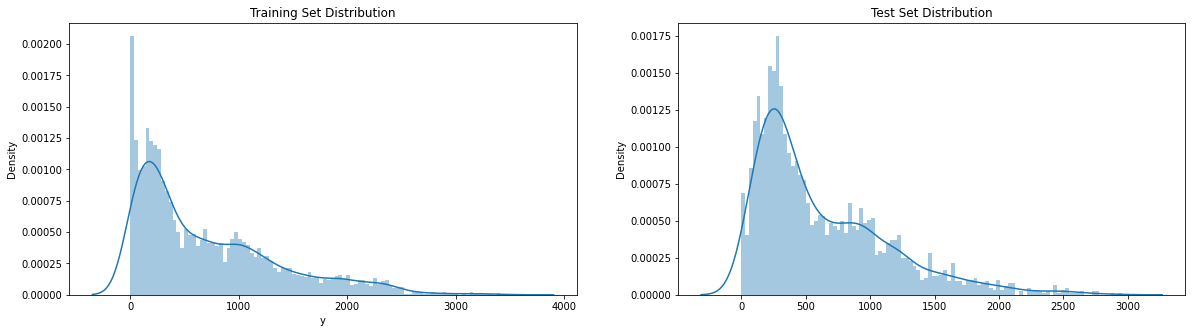

In [45]:
predsTest = lModel.predict(X=dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(20,5)
sns.distplot(yLabels,ax=ax1,bins=100)
sns.distplot(np.exp(predsTest),ax=ax2,bins=100)
ax1.set(title="Training Set Distribution")
ax2.set(title="Test Set Distribution")
plt.show()

## Regularization Model -  Ridge

In [46]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01,0.05,0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
grid_ridge_m.fit(X = X_train,y = np.log1p(y_train))
preds = grid_ridge_m.predict(X= X_validate)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(preds),False))


{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.6704028507431485


### Regularization Model - Lasso

In [47]:
lasso_m_ = Lasso()

alpha  = [0.001,0.005,0.01,0.3,0.1,0.3,0.5,0.7,1]
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit(X = X_train,y = np.log1p(y_train))
# Find the number of nonzero coefficients (selected features)
best_lr = grid_lasso_m.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))
preds = grid_lasso_m.predict(X= X_validate)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(preds),False))


Total number of features: 16
Number of selected features: 16
{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.6709505991394713


### Ensemble Models - Random Forest

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
rfModel = RandomForestRegressor(bootstrap=False, max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=6, n_estimators=100)
rfModel.fit(X = X_train,y = np.log1p(y_train))
rf_pred = rfModel.predict(X= X_validate)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(rf_pred),False))

RMSLE Value For Random Forest:  0.3227745605108258


### Feature Importance By Random Forest

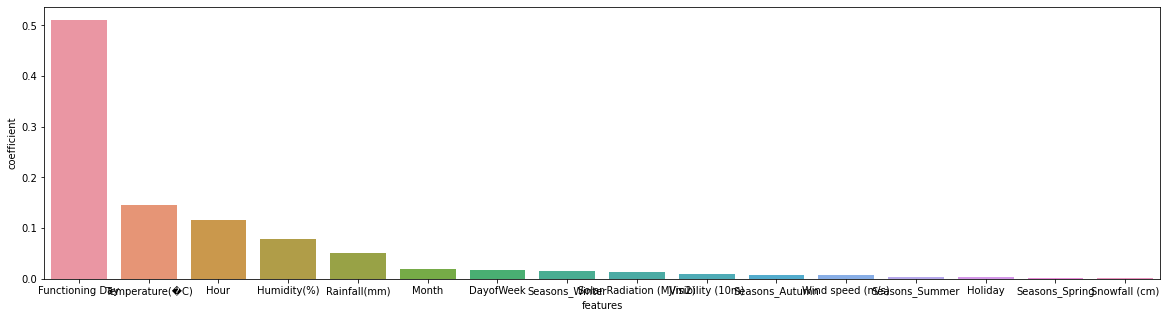

In [49]:
features = pd.DataFrame()
features['features'] = X_train.columns
features['coefficient'] = rfModel.feature_importances_
features.sort_values(by=['coefficient'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=features,x="features",y="coefficient",ax=ax)
plt.show()

## Ensemble Model - Gradient Boost

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(learning_rate=0.01,max_depth=4,n_estimators=4000,random_state=1,subsample=0.5) 
yLabelsLog = np.log1p(yLabels)
gbm.fit(X = X_train,y = np.log1p(y_train))
preds = gbm.predict(X= X_validate)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.3085687826938607


## XGBoost Model 

In [51]:
regressor = XGBRegressor(n_estimators=1000, learning_rate=0.05)
regressor.fit(X = X_train,y = np.log1p(y_train),early_stopping_rounds=5, 
             eval_set=[(X_validate, y_validate)],verbose=False)
xgb_pred = regressor.predict(X= X_validate)
print ("RMSLE Value For xgboost: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(xgb_pred),False))


RMSLE Value For xgboost:  0.31863049989108605


## StackingRegressor

In [52]:
estimators = [('Random Forest', RandomForestRegressor()),
              ('XGB', XGBRegressor()),
              ('Gradient Boosting', GradientBoostingRegressor())
             ]

stack = StackingRegressor(estimators=estimators,cv=10, final_estimator=Ridge() ,passthrough=True)

stack.fit(X = X_train,y = np.log1p(y_train))

stack_pred = stack.predict(X_validate)
print ("RMSLE Value ForStackingRegressor: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(stack_pred),False))

RMSLE Value ForStackingRegressor:  0.3056501434027015


In [53]:
predsTest = gbm.predict(X=dataTest)

## Submission 

In [54]:
# Write predictions
submission = pd.DataFrame({
        "ID": ID,
        "y": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('Seoul_predictions1.csv', index=False)